In [22]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

global X_train, X_test, y_train, y_test


def splitlist(list):
    list1 = []
    list2 = []
    for i in list:
        list1.append(i[0])
        list2.append(i[1])
    return list1, list2


def merge_shuffle(list1, list2):
    list = []
    for i in range(len(list1)):
        list.append(list1[i])
        list.append(list2[i])
    # random.shuffle(list)
    return list


def readfile(file):
    f = open(file, "r")
    result = []
    c = 0
    for i in f:
        if c <= 10000:
            # print(c)
            c += 1
            # print(c)
            list = []
            line = i[1:-3].split(", [")
            # print(line)
            list.append(int(line[0]))
            temp = []
            # print(list)
            for j in line[1].split(", "):
                if "." not in j:
                    temp.append(int(j))
                else:
                    temp.append(float(j))
            # print(temp)
            list.append(temp)
            # print("test")
            result.append(list)
    f.close()
    return result


def selectfeatures(features, indexs):
    result = []
    length = len(features[0])
    for w in features:
        temp = []
        for i in range(1, len(w)+1):
            if i in indexs:
                temp.append(w[i-1])
        result.append(temp)
    return result


def Scale():
    global X_train, X_test
    X_train_svm, X_test_svm = X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_svm = scaler.transform(X_train)
    X_test_svm = scaler.transform(X_test)
    return X_train_svm, X_test_svm


def Kbest(X_train_svm, X_test_svm, n):
    sel = SelectKBest(chi2, k=n)
    sel.fit(X_train_svm, y_train)
    # print(sel.scores_)
    X_train_svm = sel.transform(X_train_svm)
    X_test_svm = sel.transform(X_test_svm)
    return X_train_svm, X_test_svm


def MYSVM():
    X = Scale()
    X = Kbest(X[0], X[1], 52)
    X_train_svm = X[0]
    X_test_svm = X[1]
    #print("Training samples SVM: ", X_train_svm.shape)
    clf = svm.SVC(kernel='rbf')
    print("traning...")
    clf.fit(X_train_svm, y_train)
    y_pred = clf.predict(X_test_svm)
    print("Accuracy linear SVM : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred))


def RandomForest(n=54):
    t = idx[:n]
    print("traning...")
    rf_w = RandomForestClassifier(random_state=100, n_estimators=100)
    rf_w.fit(X_train, y_train)
    y_pred_rf_w = rf_w.predict(X_test)
    print("Accuracy Random Forest : ",
          metrics.accuracy_score(y_test, y_pred_rf_w))
    conf_mat = confusion_matrix(y_test, y_pred_rf_w)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf_w))
    # plot Importances
    #print("Confusion Matrix:")
    importances = rf_w.feature_importances_
    final_df = pd.DataFrame(
        {"Features": t, "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()
    
    print("RFECV")
    sel_rfe_tree = RFECV(estimator=rf_w, step=1)
    print("traning...")
    X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
    y_pred_rf = sel_rfe_tree.predict(X_test)
    print("Accuracy Random Forest with RFECV : ",
          metrics.accuracy_score(y_test, y_pred_rf))
    print("Training Samples: ", X_train_rfe_tree.shape)
    print(sel_rfe_tree.get_support())
    print(sel_rfe_tree.grid_scores_)
    print(X_train_rfe_tree.shape)
    print(sel_rfe_tree.ranking_)
    
    conf_mat = confusion_matrix(y_test, y_pred_rf)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf))


def RFRFECV():
    model_tree = RandomForestClassifier(n_estimators=100, random_state=100)
    print("RFECV")
    sel_rfe_tree = RFECV(estimator=model_tree, step=1)
    print("traning...")
    X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
    print("Training Samples: ", X_train_rfe_tree.shape)
    print(sel_rfe_tree.get_support())
    print(sel_rfe_tree.grid_scores_)
    print(X_train_rfe_tree.shape)
    print(sel_rfe_tree.ranking_)
    y_pred_rf = sel_rfe_tree.predict(X_test)
    print("Accuracy Random Forest with RFECV : ",
          metrics.accuracy_score(y_test, y_pred_rf))
    conf_mat = confusion_matrix(y_test, y_pred_rf)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf))
    model_tree.fit(X_train_rfe_tree,y_train)
    importances = model_tree.feature_importances_
    final_df = pd.DataFrame(
        {"Features": idx[:43], "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()


idx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
mal = splitlist(readfile("malfeatures.txt"))
beg = splitlist(readfile("begfeatures.txt"))
features = merge_shuffle(mal[1], beg[1])
labels = merge_shuffle(mal[0], beg[0])
#features = selectfeatures(features, indexes)
features = np.array(features)
print("Number of samples", len(features))

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=109)
print("Shape of samples", X_train.shape)

var_thr = VarianceThreshold(threshold=0.0)
X_train = var_thr.fit_transform(X_train)
X_test = var_thr.fit_transform(X_test)
print("Traning samples", X_train.shape)
print("Testing Samples: ", X_test.shape)

Number of samples 20000
Shape of samples (14000, 54)
Traning samples (14000, 52)
Testing Samples:  (6000, 52)


In [6]:
MYSVM()

Training samples SVM:  (14000, 52)
traning...
Accuracy linear SVM :  0.8713333333333333
Confusion Matrix:
[[2662  388]
 [ 384 2566]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3050
           1       0.87      0.87      0.87      2950

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



traning...
Accuracy Random Forest :  0.9478333333333333
Confusion Matrix:
[[2929  121]
 [ 192 2758]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3050
           1       0.96      0.93      0.95      2950

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



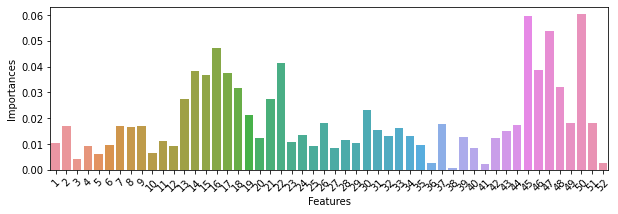

RFECV
traning...
Accuracy Random Forest with RFECV :  0.943
Training Samples:  (14000, 43)
[ True  True False  True False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False  True False False  True  True  True  True  True  True  True
  True  True  True False]
[[0.72785714 0.73214286 0.74392857 0.73285714 0.74821429]
 [0.82857143 0.81678571 0.83       0.83821429 0.84      ]
 [0.87535714 0.86035714 0.88107143 0.88428571 0.87321429]
 [0.88535714 0.87321429 0.88678571 0.895      0.88321429]
 [0.89214286 0.88178571 0.8875     0.90321429 0.89321429]
 [0.91321429 0.91071429 0.90678571 0.915      0.91285714]
 [0.92107143 0.92107143 0.90785714 0.91357143 0.91821429]
 [0.9225     0.92464286 0.90642857 0.91964286 0.925     ]
 [0.92321429 0.92357143 0.91428571 0.93       0.92642857]
 [0.91857143 0.92892857 0.92071429 0.92892857 0.92785714]
 [0.9239285

c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [23]:
nf = 52
RandomForest(n=nf)

RFECV
traning...
Training Samples:  (14000, 43)
[ True  True False  True False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False  True False False  True  True  True  True  True  True  True
  True  True  True False]
[[0.72785714 0.73214286 0.74392857 0.73285714 0.74821429]
 [0.82857143 0.81678571 0.83       0.83821429 0.84      ]
 [0.87535714 0.86035714 0.88107143 0.88428571 0.87321429]
 [0.88535714 0.87321429 0.88678571 0.895      0.88321429]
 [0.89214286 0.88178571 0.8875     0.90321429 0.89321429]
 [0.91321429 0.91071429 0.90678571 0.915      0.91285714]
 [0.92107143 0.92107143 0.90785714 0.91357143 0.91821429]
 [0.9225     0.92464286 0.90642857 0.91964286 0.925     ]
 [0.92321429 0.92357143 0.91428571 0.93       0.92642857]
 [0.91857143 0.92892857 0.92071429 0.92892857 0.92785714]
 [0.92392857 0.92857143 0.925      0.92964286 0.9275  

c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3050
           1       0.95      0.93      0.94      2950

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



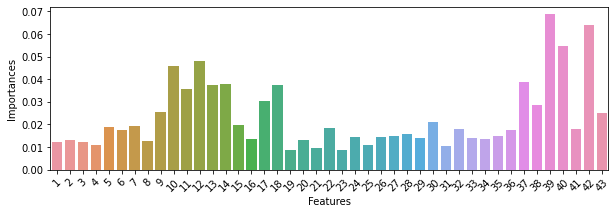

In [18]:
RFRFECV()